##1.1 Carregando o Conjunto de Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##1.2 Exploração Inicial dos Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


##1.3 Análise Univariada

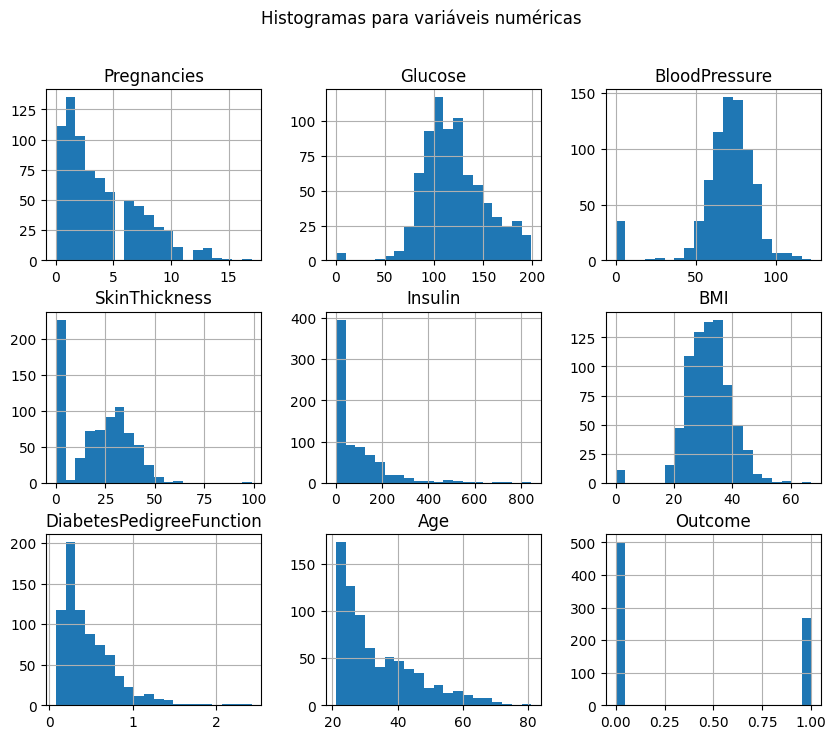

In [ ]:
df.hist(column=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'], bins=20, figsize=(10,8))
plt.suptitle('Histogramas para variáveis numéricas')
plt.show()

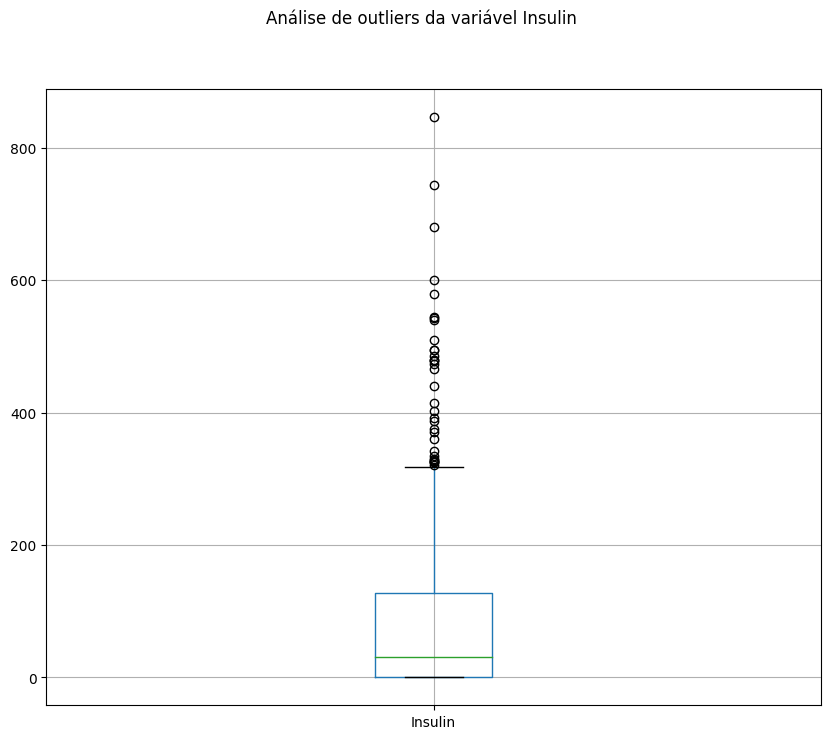

In [ ]:
plt.subplots(figsize=(10, 8))
df.boxplot(column='Insulin')
plt.suptitle('Análise de outliers da variável ''Insulin''')
plt.show()

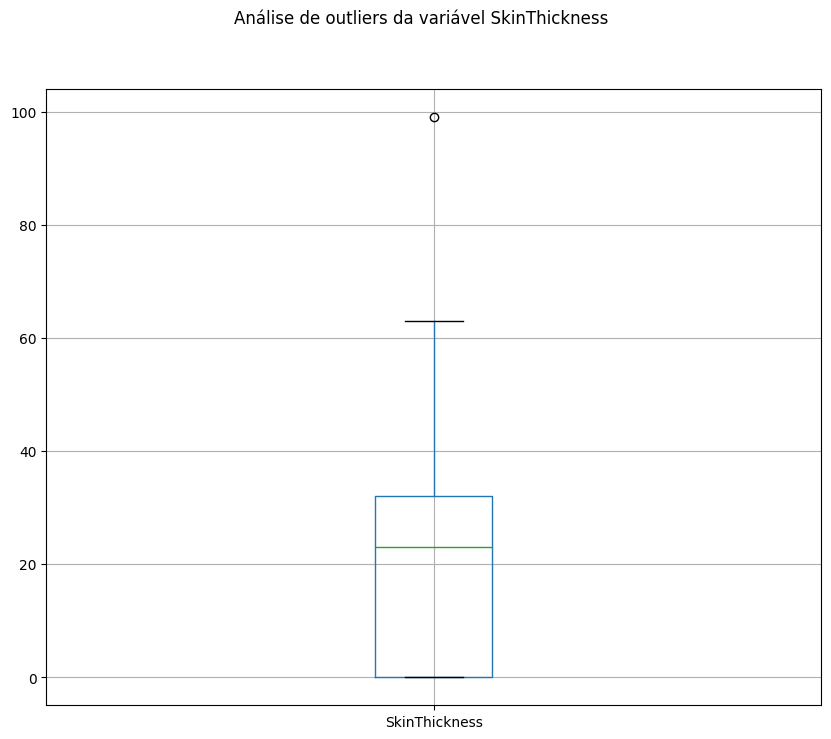

In [ ]:
plt.subplots(figsize=(10, 8))
df.boxplot(column='SkinThickness')
plt.suptitle('Análise de outliers da variável ''SkinThickness''')
plt.show()

##1.4 Análise Bivariada

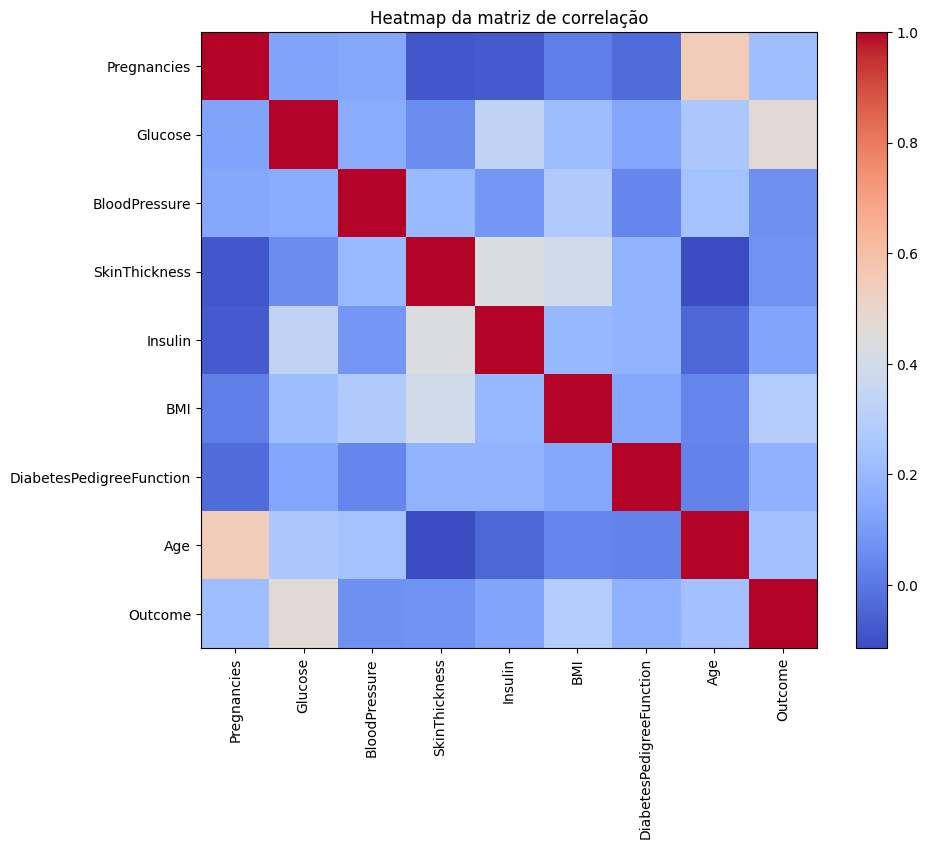

In [ ]:
corr = df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title('Heatmap da matriz de correlação')
plt.show()

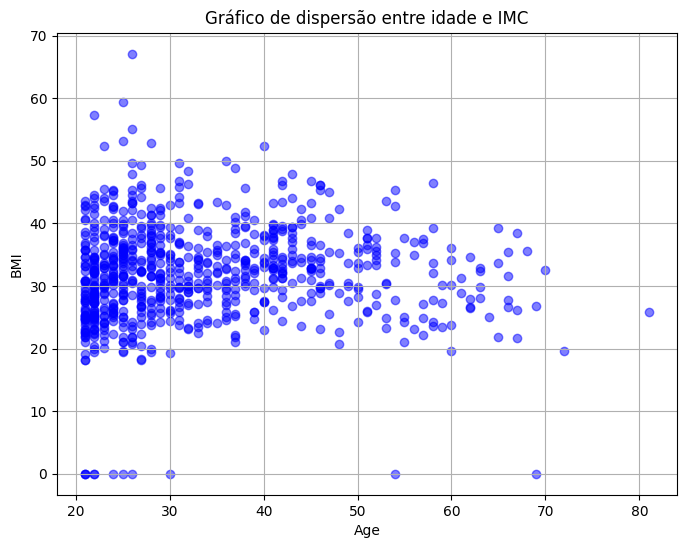

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['BMI'], alpha=0.5, color='b')
plt.title('Gráfico de dispersão entre idade e IMC')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

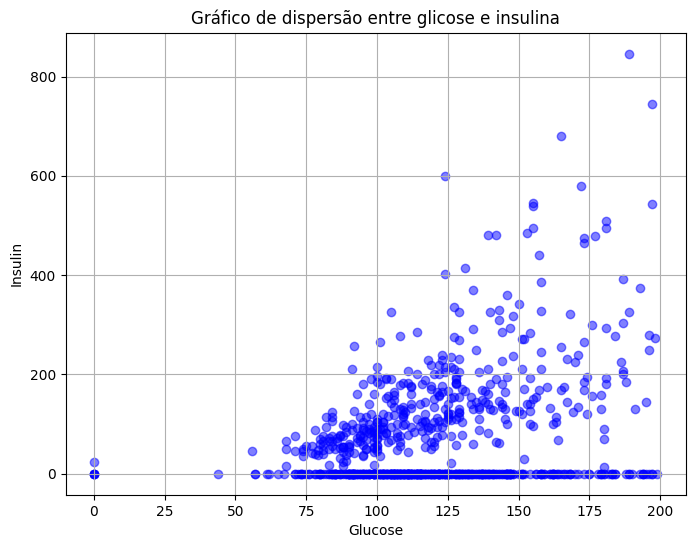

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Glucose'], df['Insulin'], alpha=0.5, color='b')
plt.title('Gráfico de dispersão entre glicose e insulina')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.grid(True)
plt.show()

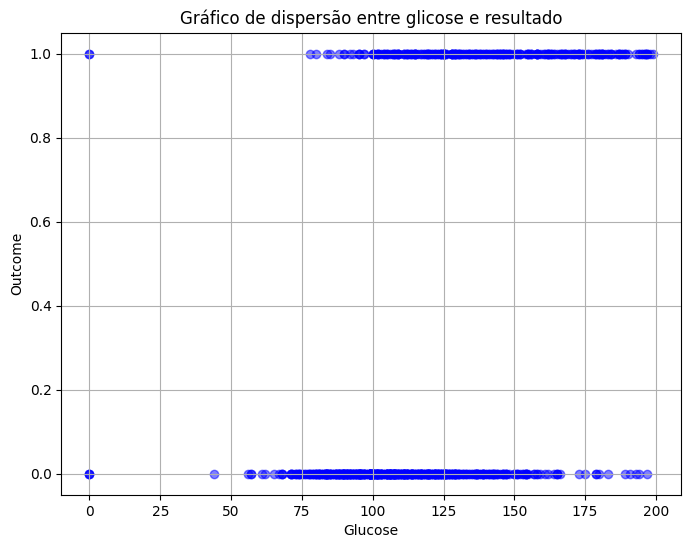

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Glucose'], df['Outcome'], alpha=0.5, color='b')
plt.title('Gráfico de dispersão entre glicose e resultado')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.grid(True)
plt.show()

Na média dos resultados positivos, a glicose tende a ser maior

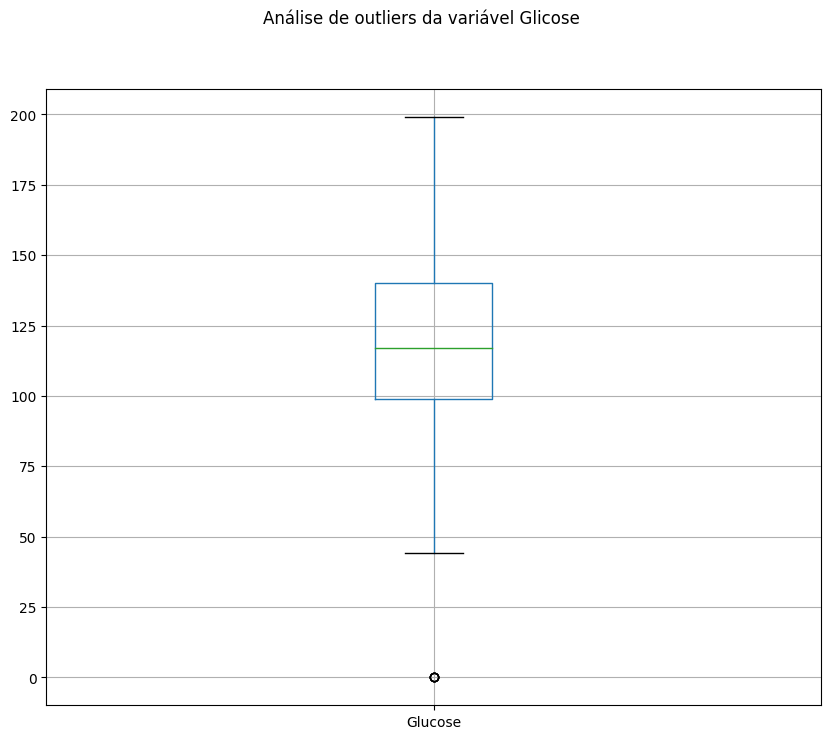

In [ ]:
plt.subplots(figsize=(10, 8))
df.boxplot(column='Glucose')
plt.suptitle('Análise de outliers da variável ''Glicose''')
plt.show()

##1.5 Análise de Variáveis Categóricas

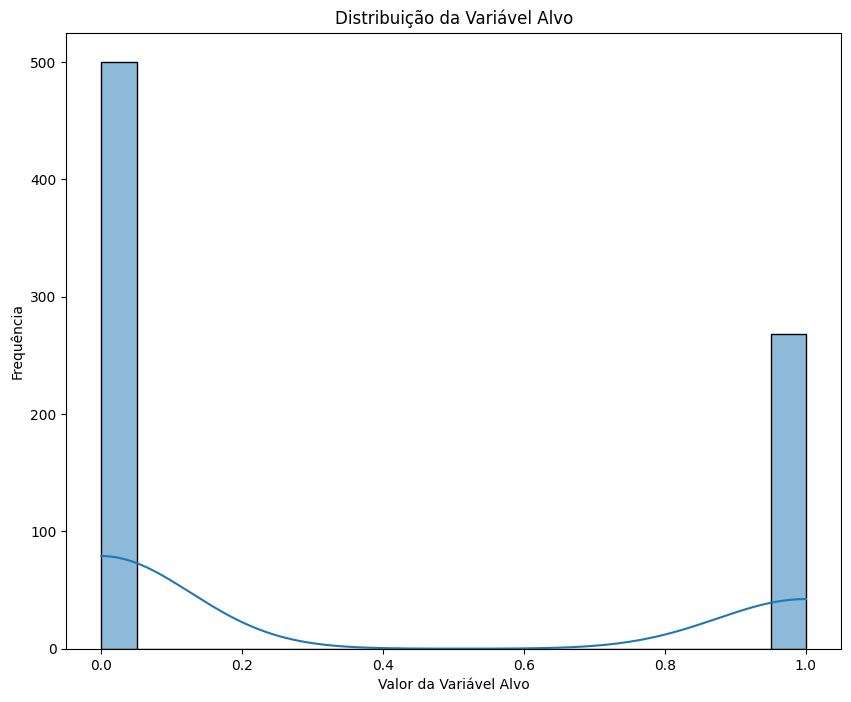

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(df['Outcome'], kde=True, bins=20)

plt.title('Distribuição da Variável Alvo')
plt.xlabel('Valor da Variável Alvo')
plt.ylabel('Frequência')
plt.show()

<Figure size 1000x1000 with 0 Axes>

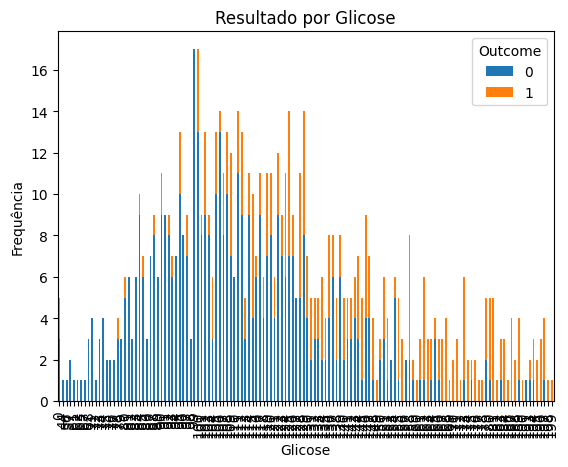

In [ ]:
plt.figure(figsize=(10, 10))
glucose_outcome_counts = pd.crosstab(df['Glucose'], df['Outcome'])
glucose_outcome_counts.plot(kind='bar', stacked=True)
plt.xlabel('Glicose')
plt.ylabel('Frequência')
plt.title('Resultado por Glicose')
plt.show()

<Figure size 1000x800 with 0 Axes>

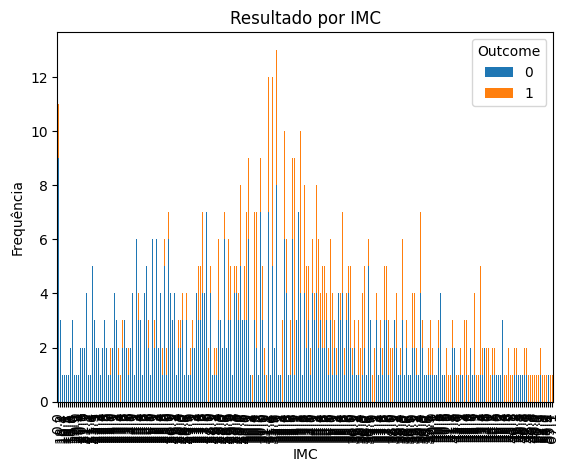

In [ ]:
plt.figure(figsize=(10, 8))
glucose_outcome_counts = pd.crosstab(df['BMI'], df['Outcome'])
glucose_outcome_counts.plot(kind='bar', stacked=True)
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.title('Resultado por IMC')
plt.show()

##1.6 Faixas de glicose

<ipython-input-71-bc0ca0a87166>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentual = df.groupby(['glu_cat', 'Outcome']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)


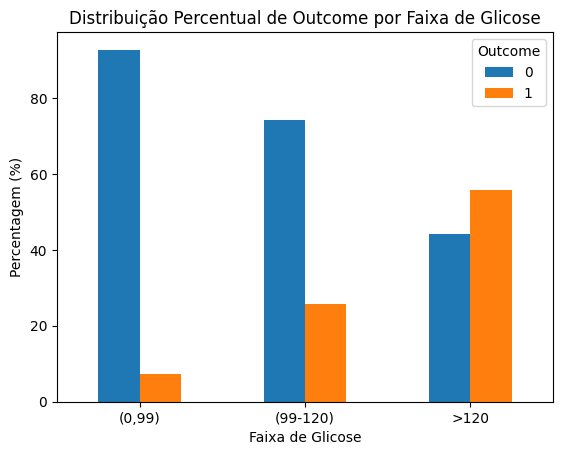

In [ ]:
bins = [0, 99, 120, float('inf')]
labels = ['(0,99)', '(99-120)', '>120']

df['glu_cat'] = pd.cut(df['Glucose'], bins=bins, labels=labels, right=True, ordered=True)

percentual = df.groupby(['glu_cat', 'Outcome']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)

percentual.plot(kind='bar', stacked=False)
plt.title('Distribuição Percentual de Outcome por Faixa de Glicose')
plt.ylabel('Percentagem (%)')
plt.xlabel('Faixa de Glicose')
plt.xticks(rotation=0)
plt.show()


In [ ]:
df_adults = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")

df_adults.columns = ["age","workclass","finalweight","education",
                 "education-num","martial-status","occupation",
                 "relationship","race","sex","capital-gain",
                 "capital-loss","hours-per-week ","native-country",
                 "income"]

for col in df_adults.columns:
    if df_adults[col].dtype == object:
        df_adults[col] = df_adults[col].str.strip()


df_adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32560 non-null  int64 
 1   workclass        32560 non-null  object
 2   finalweight      32560 non-null  int64 
 3   education        32560 non-null  object
 4   education-num    32560 non-null  int64 
 5   martial-status   32560 non-null  object
 6   occupation       32560 non-null  object
 7   relationship     32560 non-null  object
 8   race             32560 non-null  object
 9   sex              32560 non-null  object
 10  capital-gain     32560 non-null  int64 
 11  capital-loss     32560 non-null  int64 
 12  hours-per-week   32560 non-null  int64 
 13  native-country   32560 non-null  object
 14  income           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
contingencia = pd.crosstab(df_adults['income'],df_adults['native-country'])
contingencia

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
income,,,,,,,,,,,,,,,,,,,,,
<=50K,437,12,82,55,57,70,68,24,97,60,...,33,102,9,64,31,15,17,21998,62,10
>50K,146,7,39,20,2,25,2,4,9,30,...,4,12,3,16,20,3,2,7171,5,6


In [ ]:
n = contingencia.sum().sum()

qui2 = ((contingencia - contingencia.mean(axis=0)).pow(2)/contingencia.mean(axis=0)).sum().sum()

k = min(contingencia.shape) - 1

v_cramer = np.sqrt(qui2 / (n * k))

print(f"Coeficiente V de Cramer: {v_cramer:.4f}")

Coeficiente V de Cramer: 0.5252


##Valores

Income X Workclass: Coeficiente V de Cramer: 0.5405<br>
Income X Education: Coeficiente V de Cramer: 0.6068<br>
Income X Martial-status: Coeficiente V de Cramer: 0.6443 <br>
Income X Relationship: Coeficiente V de Cramer: 0.6474 <br>
Income X Race: Coeficiente V de Cramer: 0.5255<br>
Income X Sex: Coeficiente V de Cramer: 0.5503<br>
Income X Native-country: Coeficiente V de Cramer: 0.5252
